# House Prices - Advanced Regression Techniques

- Utilizaando os [dados disponíveis no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - Dataset de competição
    - A avaliação será através do erro quadrático médio

## Modelos 4 - Novos modelos
- O objetivo é aplicar algoritmos mais complexos e avaliar os resultados.
- Tópicos:
    - [Arquivo 3_1](#Arquivo3_1)
    - [Arquivo 3_2](#Arquivo3_2)
    - [Algoritmos](#Algoritmos)

<a id='Arquivo3_1'></a>
### Arquivo 3_1

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando as bases
treino = pd.read_csv('train3_1.csv')
teste = pd.read_csv('test3_1.csv')

In [3]:
# Verificando o formato da base
treino.shape

(1460, 85)

In [4]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      37
object     35
float64    13
Name: count, dtype: int64

In [5]:
# Verificando o tipo de dados nas colunas
teste.dtypes.value_counts()

object     35
int64      29
float64    20
Name: count, dtype: int64

In [6]:
# Selecionando apenas as colunas numéricas
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'GarageType_-1', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_infrequent_sklearn'],
      dtype='object')

In [7]:
# Criando uma nova base com esses valores
treino = treino.loc[:,cols_nr]
treino.shape

(1460, 50)

In [8]:
# Mantendo também apenas as colunas numéricas para a base de teste
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 49)

<a id='Arquivo3_2'></a>
### Arquivo 3_2

In [35]:
# Importando as bases
treino = pd.read_csv('train3_2.csv')
teste = pd.read_csv('test3_2.csv')

In [36]:
# Verificando o formato da base
treino.shape

(1460, 146)

In [37]:
# Verificando o formato da base
teste.shape

(1459, 145)

In [38]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      133
float64     13
Name: count, dtype: int64

In [40]:
# Verificando o tipo de dados nas colunas
teste.dtypes.value_counts()

int64      125
float64     20
Name: count, dtype: int64

<a id='Algoritmos'></a>
## Algoritmos
- Separando em treino e teste: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Novos algoritmos:
    - **Regressão Linear**:
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - **RandomForestRegressor**:
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
    - **Lasso Regression**:
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
    - **XGBoost**:
        - https://xgboost.readthedocs.io/en/stable/index.html

In [41]:
# Selecionando X e y
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [42]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [43]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Regressão Linear

In [44]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [45]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [46]:
# Fazendo a previsão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)

#### Random Forest Regressor

In [47]:
# Importando o Random Forest
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [49]:
# Fazendo a previsão
y_pred_rf = reg_rf.predict(X_test)

####  Lasso Regression

In [50]:
# Importando o Lasso Regression
from sklearn import linear_model

In [54]:
reg_lasso = linear_model.Lasso(random_state=42, max_iter=100000).fit(X_train, y_train)

In [55]:
y_pred_lasso = reg_lasso.predict(X_test)

#### XGBoost

In [56]:
# Importando o XGBoost
from xgboost import XGBRegressor

In [57]:
# Criando o regressor e fazendo o fit
reg_xgb = XGBRegressor(random_state=42).fit(X_train, y_train)

In [58]:
# Fazendo a previsão
y_pred_xgb = reg_xgb.predict(X_test)

## Avaliando os resultados
- Erro médio absoluto:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- Erro quadrático médio:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [59]:
# Importando o erro médio absoluto e o erro quadrático médio
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [60]:
# Erro regressão linear
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_rl)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_rl)}')

Erro absoluto: 22157.115236188605
Erro quadrático: 1539851963.9372888


In [61]:
# Erro Random Forest Regressor
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_rf)}')

Erro absoluto: 17920.15010373444
Erro quadrático: 993007681.3529487


In [62]:
# Erro Lasso Regression
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_lasso)}')

Erro absoluto: 22109.47397402566
Erro quadrático: 1535561973.03385


In [63]:
# Erro XGBoost
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_xgb)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_xgb)}')

Erro absoluto: 17415.3171842583
Erro quadrático: 1118488708.6055784


- **Visualizando graficamente**

In [64]:
# Importando o matplotlib
import matplotlib.pyplot as plt

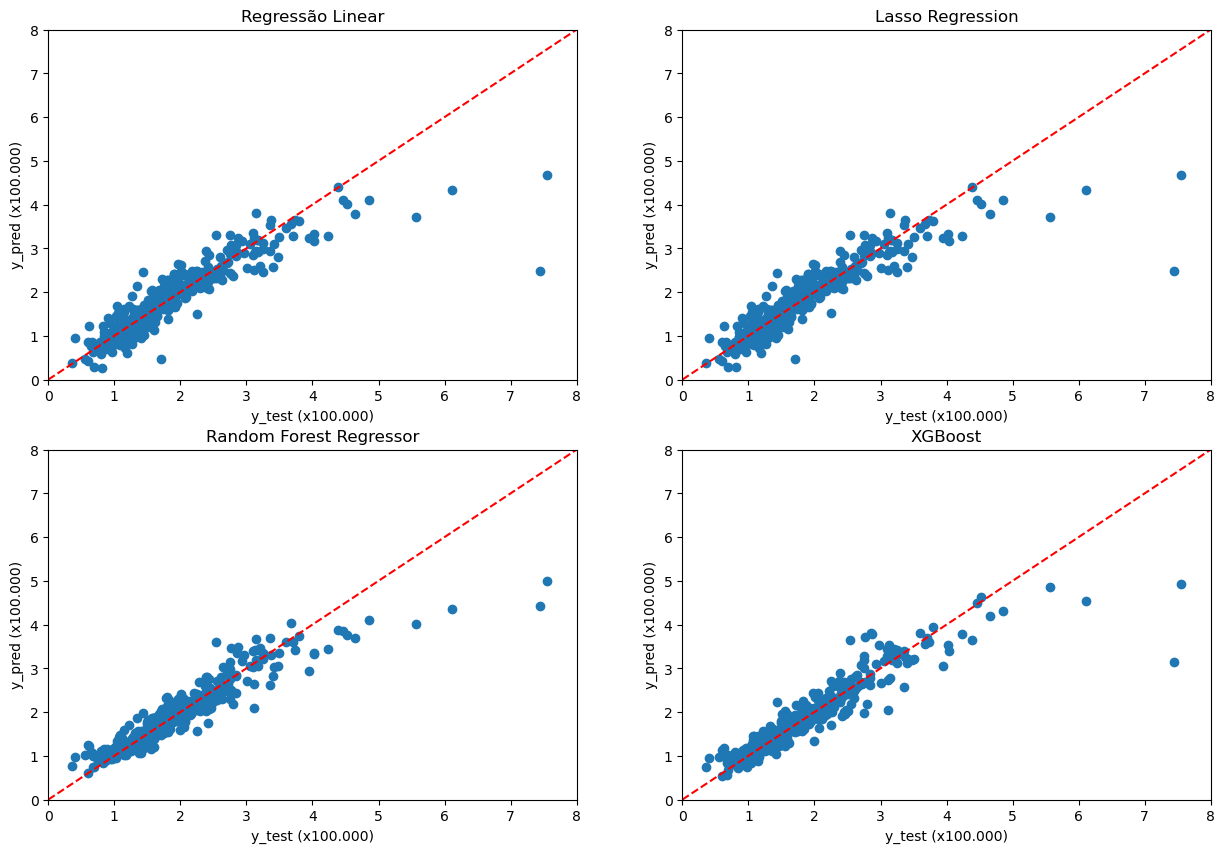

In [65]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

ax[0,0].scatter(y_test/100000, y_pred_rl/100000)
ax[0,0].plot([0,8],[0,8],'--r')
ax[0,0].set(xlim=(0, 8),ylim=(0, 8))
ax[0,0].set_xlabel('y_test (x100.000)')
ax[0,0].set_ylabel('y_pred (x100.000)')
ax[0,0].set_title('Regressão Linear')

ax[1,0].scatter(y_test/100000, y_pred_rf/100000)
ax[1,0].plot([0,8],[0,8],'--r')
ax[1,0].set(xlim=(0, 8),ylim=(0, 8))
ax[1,0].set_xlabel('y_test (x100.000)')
ax[1,0].set_ylabel('y_pred (x100.000)')
ax[1,0].set_title('Random Forest Regressor')

ax[0,1].scatter(y_test/100000, y_pred_lasso/100000)
ax[0,1].plot([0,8],[0,8],'--r')
ax[0,1].set(xlim=(0, 8),ylim=(0, 8))
ax[0,1].set_xlabel('y_test (x100.000)')
ax[0,1].set_ylabel('y_pred (x100.000)')
ax[0,1].set_title('Lasso Regression')

ax[1,1].scatter(y_test/100000, y_pred_xgb/100000)
ax[1,1].plot([0,8],[0,8],'--r')
ax[1,1].set(xlim=(0, 8),ylim=(0, 8))
ax[1,1].set_xlabel('y_test (x100.000)')
ax[1,1].set_ylabel('y_pred (x100.000)')
ax[1,1].set_title('XGBoost')

plt.show()

## Construindo Previsão
- Utilizando o **Random Forest**

In [66]:
# Fazer a previsão
y_pred = reg_rf.predict(teste)

In [67]:
# Adicionando a coluna na base
teste['SalePrice'] = y_pred

In [68]:
# Extraindo as colunas Id e SalePrice
resultado = teste[['Id','SalePrice']]

In [70]:
# Exportando para um csv
# resultado.to_csv('resultado4_1.csv', index=False)

resultado.to_csv('resultado4_2.csv', index=False)

- **Resultado**
<img src="pkgImagens/resultado4.png" width=900>